In [1]:
import pandas as pd
import os, re
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import datetime
from tensorflow.keras import layers, models

In [2]:
import os
import re
import cv2

def load_images(path="coral_image_jpg"):
    train_folder = os.path.join(os.getcwd(), path, "train")
    test_folder = os.path.join(os.getcwd(), path, "test")
    
    X_train, X_test, Y_train, Y_test = [], [], [], []
    
    # Loading images from train folder to X_train and label to Y_train
    train_count = 0
    for image_fname in os.listdir(train_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.jpg', image_fname)
        if not image_re:
            print(f"Filename {image_fname} does not match the expected pattern.")
            continue
        
        image_path = os.path.join(train_folder, image_fname)
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue
        
        try:
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        except cv2.error as e:
            print(f"Error converting image: {image_path}. Error: {e}")
            continue
        
        label = int(image_re.group(2))  # Convert label to integer
        
        X_train.append(image_rgb)
        Y_train.append(label)
        train_count += 1
        if train_count % 1000 == 0:
            print(f"Loaded {train_count} training images.")
    print("Loaded train folder")
    
    # Loading images from test folder to X_test and label to Y_test
    test_count = 0
    for image_fname in os.listdir(test_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.jpg', image_fname)
        if not image_re:
            print(f"Filename {image_fname} does not match the expected pattern.")
            continue
        
        image_path = os.path.join(test_folder, image_fname)
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue
        
        try:
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        except cv2.error as e:
            print(f"Error converting image: {image_path}. Error: {e}")
            continue
        
        label = int(image_re.group(2))  # Convert label to integer
        
        X_test.append(image_rgb)
        Y_test.append(label)
        test_count += 1
        if test_count % 1000 == 0:
            print(f"Loaded {test_count} testing images.")
    print("Loaded test folder")
    
    return X_train, X_test, Y_train, Y_test

# Call the function to load images
X_train, X_test, Y_train, Y_test = load_images()


Loaded 1000 training images.
Loaded 2000 training images.
Loaded 3000 training images.
Loaded 4000 training images.
Loaded train folder
Loaded test folder


In [3]:
x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4112, 225, 225, 3)
(258, 225, 225, 3)
(4112,)
(258,)


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /=255

In [5]:
from keras.utils import to_categorical

print("Shape before one-hot encoding : ",y_train.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("Shape after one-hot encoding : ",y_test.shape)

Shape before one-hot encoding :  (4112,)
Shape after one-hot encoding :  (258, 2)


In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam

Start Model Building Baseline model

In [7]:
def create_model(input_shape=(225, 225, 3), num_classes=2):
    model = models.Sequential()
    
    # Convolutional layers
    model.add(layers.Conv2D(16, (5,5), activation='relu', input_shape=input_shape, padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2))),
    model.add(layers.Conv2D(32, (5,5), activation='relu',padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (5,5), activation='relu',padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (5,5), activation='relu', padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer
    model.add(layers.Dense(2, activation='softmax'))

    return model

In [8]:
# Create an instance of the model
model = create_model()

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [10]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = "Adam")
history = model.fit(x_train, y_train, epochs = 20, batch_size=32, validation_data = (x_test, y_test))

Epoch 1/20
129/129 [==============================] - 59s 449ms/step - loss: 0.6458 - accuracy: 0.6041 - val_loss: 0.5477 - val_accuracy: 0.7519
Epoch 2/20
129/129 [==============================] - 58s 447ms/step - loss: 0.5238 - accuracy: 0.7376 - val_loss: 0.5067 - val_accuracy: 0.7442
Epoch 3/20
129/129 [==============================] - 57s 446ms/step - loss: 0.4768 - accuracy: 0.7768 - val_loss: 0.5804 - val_accuracy: 0.7597
Epoch 4/20
129/129 [==============================] - 57s 445ms/step - loss: 0.4556 - accuracy: 0.7809 - val_loss: 0.4904 - val_accuracy: 0.7946
Epoch 5/20
129/129 [==============================] - 57s 442ms/step - loss: 0.4193 - accuracy: 0.7991 - val_loss: 0.4363 - val_accuracy: 0.7829
Epoch 6/20
129/129 [==============================] - 57s 446ms/step - loss: 0.3908 - accuracy: 0.8239 - val_loss: 0.4155 - val_accuracy: 0.8178
Epoch 7/20
129/129 [==============================] - 58s 446ms/step - loss: 0.3471 - accuracy: 0.8485 - val_loss: 0.4910 - val_ac

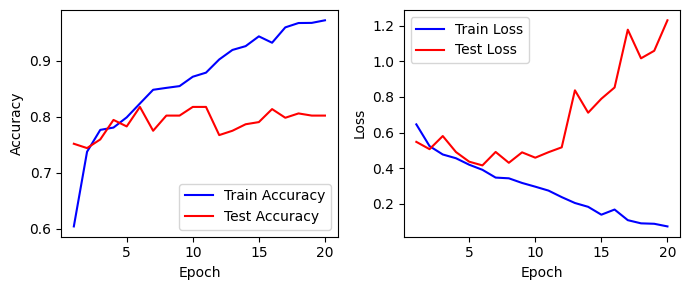

In [11]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
plt.show()

In [31]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [22]:
import keras
from keras import layers, models
import keras_tuner as kt
from keras.callbacks import TensorBoard
import os
import datetime

Hyperparameter Tunning

In [9]:
def build_model_tuning(hp):
    model = models.Sequential()

    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=64, step=32),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5, 7]),
        activation='relu',
        input_shape=(225, 225, 3),
        padding='same'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=32),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5, 7]),
        activation='relu',
        padding='same'
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=64, max_value=128, step=64),
        kernel_size=hp.Choice('conv_3_kernel', values=[3, 5, 7]),
        activation='relu',
        padding='same'
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(
        filters=hp.Int('conv_4_filter', min_value=128, max_value=128, step=128),
        kernel_size=hp.Choice('conv_4_kernel', values=[3, 5, 7]),
        activation='relu',
        padding='same'
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=512, step=64),
        activation='relu'
    ))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(layers.Dense(2, activation=hp.Choice('output_activation', values=['softmax'])))
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', 
                                min_value=1e-5, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        run_eagerly=False
    )
    
    return model

In [10]:
# Set up TensorBoard log directory
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [11]:
tuner = kt.RandomSearch(
    hypermodel=build_model_tuning,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory="my_dir",
    project_name="coral_classification",
)

In [ ]:
tuner.search(x_train, y_train,epochs=10,validation_data=(x_test, y_test),batch_size=32,callbacks=[tensorboard_callback])

Trial 10 Complete [00h 18m 25s]
val_accuracy: 0.8410852551460266

Best val_accuracy So Far: 0.8449612259864807
Total elapsed time: 04h 24m 33s

Search: Running Trial #11

Value             |Best Value So Far |Hyperparameter
64                |32                |conv_1_filter
7                 |5                 |conv_1_kernel
32                |32                |conv_2_filter
5                 |7                 |conv_2_kernel
128               |128               |conv_3_filter
5                 |5                 |conv_3_kernel
128               |128               |conv_4_filter
3                 |7                 |conv_4_kernel
192               |448               |dense_units
0.4               |0.4               |dropout
softmax           |softmax           |output_activation
0.00096494        |0.00014235        |learning_rate

Epoch 1/10
129/129 [==============================] - 171s 1s/step - loss: 0.7003 - accuracy: 0.5433 - val_loss: 0.6906 - val_accuracy: 0.5310
Epoch 2/10
1

KeyboardInterrupt: 

In [13]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Save the model to a file
best_model.save('best_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
all_models = tuner.get_best_models(num_models=len(tuner.oracle.trials))

In [18]:
for i, model in enumerate(all_models):
    model.save(f'model_{i}.h5')

Rebuild Model using the Tuned Parameter

In [17]:
def create_model(input_shape=(225, 225, 3), num_classes=2):
    model = models.Sequential()
    
    # Convolutional layers
    model.add(layers.Conv2D(64, (7,7), activation='relu', input_shape=input_shape, padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2))),
    
    model.add(layers.Conv2D(32, (5,5), activation='relu',padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (5,5), activation='relu',padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (5,5), activation='relu', padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))  # Dropout layer
    model.add(layers.Dense(2, activation='softmax'))
    
    return model

In [18]:
# Create an instance of the model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      51232     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       102528    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [20]:
optimizer_1 = Adam(learning_rate = 0.000013799664728292382)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer_1, run_eagerly = False)

In [23]:
# Set up TensorBoard log directory
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [24]:
history = model.fit(x_train, y_train ,epochs=10,validation_data=(x_test, y_test), batch_size=32,callbacks=[tensorboard_callback])

Epoch 1/10
129/129 [==============================] - 181s 1s/step - loss: 0.6789 - accuracy: 0.5423 - val_loss: 0.6566 - val_accuracy: 0.5349
Epoch 2/10
129/129 [==============================] - 180s 1s/step - loss: 0.6173 - accuracy: 0.6544 - val_loss: 0.5679 - val_accuracy: 0.7209
Epoch 3/10
129/129 [==============================] - 179s 1s/step - loss: 0.5587 - accuracy: 0.7065 - val_loss: 0.5537 - val_accuracy: 0.7364
Epoch 4/10
129/129 [==============================] - 179s 1s/step - loss: 0.5236 - accuracy: 0.7267 - val_loss: 0.5037 - val_accuracy: 0.7713
Epoch 5/10
129/129 [==============================] - 178s 1s/step - loss: 0.5004 - accuracy: 0.7617 - val_loss: 0.4874 - val_accuracy: 0.7713
Epoch 6/10
129/129 [==============================] - 178s 1s/step - loss: 0.4788 - accuracy: 0.7719 - val_loss: 0.4796 - val_accuracy: 0.7636
Epoch 7/10
129/129 [==============================] - 180s 1s/step - loss: 0.4697 - accuracy: 0.7729 - val_loss: 0.4660 - val_accuracy: 0.8023

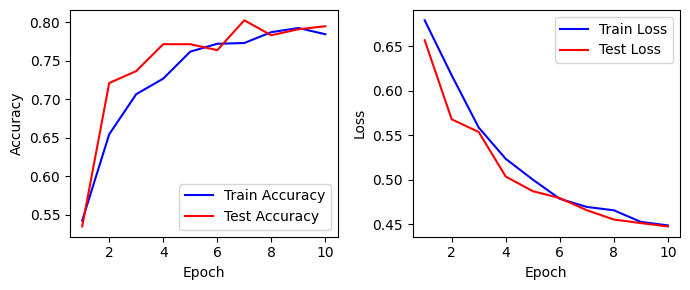

In [25]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
plt.show()

In [26]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f'Test Accuracy {accuracy*100:.2f}%')

9/9 [==============================] - 4s 390ms/step - loss: 0.4478 - accuracy: 0.7946
Test Accuracy 79.46%


In [28]:
import numpy as np
from sklearn.metrics import classification_report

predict_x = model.predict(x_test)
predict1 = np.argmax(predict_x, axis = 1)
print(predict1)

target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(np.array([int(class_) for class_ in Y_test]), predict1, target_names = target_names))

9/9 [==============================] - 4s 386ms/step
[1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1]
              precision    recall  f1-score   support

     Class 0       0.77      0.88      0.82       137
     Class 1       0.84      0.69      0.76       121

    accuracy                           0.79       258
   macro avg       0.80      0.79      0.79       258
weighted avg       0.80      0.79      0.79       258



9/9 [==============================] - 4s 388ms/step
[1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1]
              precision    recall  f1-score   support

     Class 0       0.77      0.88      0.82       137
     Class 1       0.84      0.69      0.76       121

    accuracy                           0.79       258
   macro avg       0.80      0.79      0.79       258
weighted avg       0.80      0.79      0.79       258



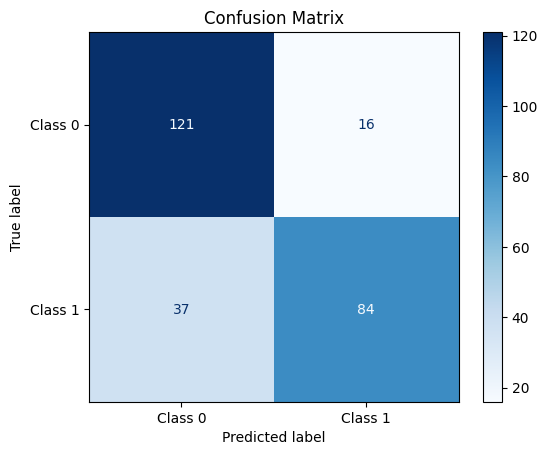

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

predict_x = model.predict(x_test)
predict1 = np.argmax(predict_x, axis=1)

print(predict1)

target_names = ["Class {}".format(i) for i in range(2)]  # Adjust the range according to the number of classes
print(classification_report(np.array([int(class_) for class_ in Y_test]), predict1, target_names=target_names))

#Compute confusion matrix
cm = confusion_matrix(np.array([int(class_) for class_ in Y_test]), predict1)

#Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [30]:
model.save('CNN_Final_Model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
model_reget = tf.keras.models.load_model('CNN_Final_Model.h5')

# Print model summary
model_reget.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      51232     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       102528    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [34]:
import pickle

# Save the history object
with open('history_CNN_Final.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [36]:
# Load the history object from the file
with open('history_CNN_Final.pkl', 'rb') as file:
    history_reget = pickle.load(file)

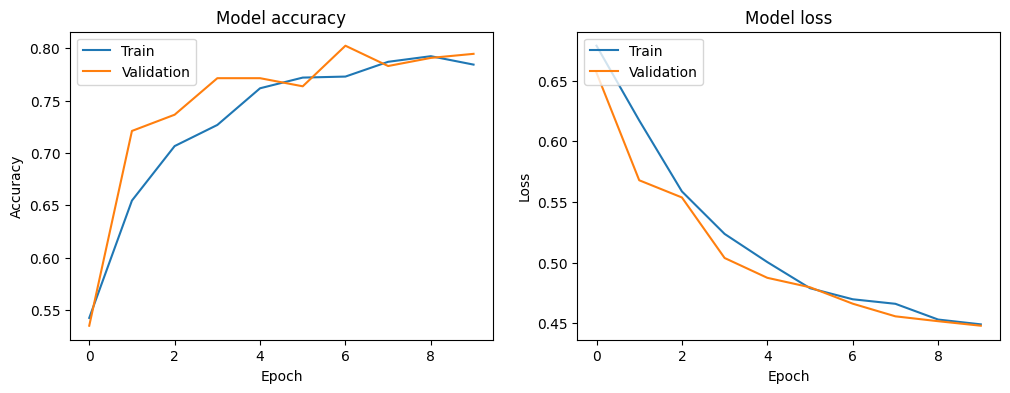

In [44]:
# reget history to plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_reget['accuracy'])
plt.plot(history_reget['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_reget['loss'])
plt.plot(history_reget['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

9/9 [==============================] - 4s 383ms/step
[1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1]
              precision    recall  f1-score   support

     Class 0       0.77      0.88      0.82       137
     Class 1       0.84      0.69      0.76       121

    accuracy                           0.79       258
   macro avg       0.80      0.79      0.79       258
weighted avg       0.80      0.79      0.79       258



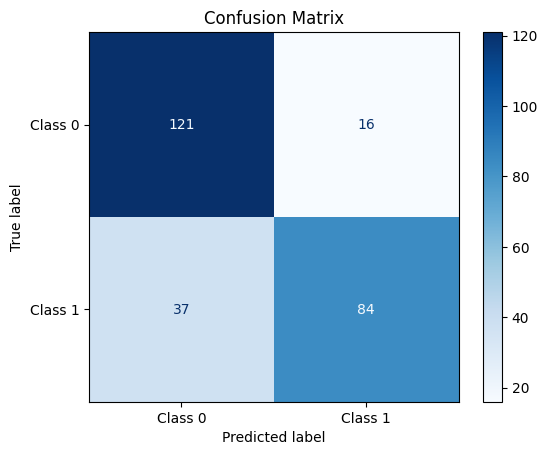

In [43]:
# MODEL_REGET to plot confusion matrix
predict_x = model_reget.predict(x_test)
predict1 = np.argmax(predict_x, axis=1)

print(predict1)

target_names = ["Class {}".format(i) for i in range(2)]  # Adjust the range according to the number of classes
print(classification_report(np.array([int(class_) for class_ in Y_test]), predict1, target_names=target_names))

#Compute confusion matrix
cm = confusion_matrix(np.array([int(class_) for class_ in Y_test]), predict1)

#Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [47]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

# Save it under the form of a json file
with open('CNN_Final.json', 'w') as json_file:
    json.dump(history_dict, json_file)